# **Data Processing**

In [1]:
# disregard unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [3]:
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.linear_model import LogisticRegression

# divide data
from sklearn.model_selection import train_test_split

In [4]:
# get dataset
df = pd.read_csv("https://raw.githubusercontent.com/Junnie-FTWB8/wild_rift/main/povpred.csv")

HTTPError: HTTP Error 404: Not Found

In [ ]:
df.drop('borrowing_recency',axis=1)

In [ ]:
df.info()

# **Data Cleaning**

In [ ]:
sns.heatmap(df.isnull(),cbar=False, cmap="viridis")

In [ ]:
# make all T/F to 1,0
# columns to change
df.replace({False:0, True: 1}, inplace= True)
df.head(2)

In [ ]:
# empty
# education_level
# bank_interest_rate

In [ ]:
df['poverty_label'] = df['poverty_probability'].apply(lambda x: 0 if x <= 0.5 else 1)

# **Modeling**

**Use the numerical variables first**

In [ ]:
# Use numerical values first
df_numerical = df.drop(['country', 'religion', 'employment_type_last_year', 'relationship_to_hh_head', 'employment_category_last_year', 'bank_interest_rate', 'education_level', 'poverty_probability'],axis=1)
df_model = df_numerical

**Train test split**

In [ ]:
X = df_model.drop('poverty_label', axis=1)
y = df_model['poverty_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)
predictions

# **Metrics for Evaluating Classifiers**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

# Accuracy

This metric measures the ratio of correct predictions over the total number of predictions.

In [ ]:
print(accuracy_score(y_test,predictions))

While its simplicity is appealing, the most significant reason why accuracy is not a good measure for imbalanced data is that it doesn't consider the nuances of classification. Measured in a vacuum, it simply provides a limited view of the model's true dependability.

In [ ]:
df_model['poverty_label'].value_counts()
# Change this depending on the dataset

### Confusion matrix <a class="anchor" id="cm"></a>

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

<img src="https://i.ytimg.com/vi/AOIkPnKu0YA/maxresdefault.jpg" />

In [ ]:
cm = confusion_matrix(y_test,predictions)
print(cm)

In [ ]:
TP = cm[0][0] # The model predicted true and it is true.
FP = cm[0][1] # The model predicted True and it is false.
FN = cm[1][0] # The model predicted false and it is true.
TN = cm[1][1] # The model predicted false and it is false.

### Precision



Precision is a way for us to measure how many predictions did our model correctly predict out of all the predictions made.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*MV1tjJLTc68slUy3GL2ftQ.png" />

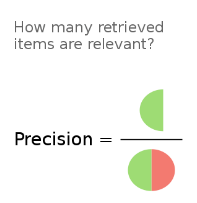

In [ ]:
precision_score = sklearn.metrics.precision_score(y_test, predictions)
sklearn.metrics.precision_score(y_test, predictions)

### Recall

Recall, on the other hand, is a way for us to measure how many records (or datapoints, or rows) did we correctly predict out of all records we have.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*LOEPzJuZqnnFYUI2HfRbwg.png" />

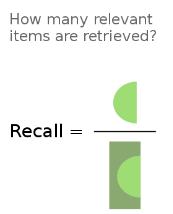

In [ ]:
recall_score = sklearn.metrics.recall_score(y_test, predictions)
sklearn.metrics.recall_score(y_test, predictions)

### Precision vs Recall

Actually Precision and Recall only differs on the False Positive and the False Negative.

Suppose we want to predict people who will Survive:
False Positive is the number of people who “Survived” that are not actually a survivor.
False Negative is the number of people who “Survived” we fail to predict as a survivor.
So, False Positive and False Negative is, in a way, “the number of predictions that are wrong”.

**Precision and Recall must be relatively balanced**
- Classification (85 to 90)
- Regression (60 to 80)

### Sensitivity (or Recall or True Positive Rate)

Sensitivity talks about the number of positive records correctly predicted.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*oGisKlXnsa8HdjqsQJJ0mw.png" />

In [ ]:
# sensitivity =


### Specificity (or True Negative Rate)

Specificity talks ambout the number of negative records correctly predicted.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*zkGNlhKPOpWkeJcACbbEhA.png" />

In [ ]:
specificity = sklearn.metrics.recall_score(y_test, predictions, pos_label =0)
sklearn.metrics.recall_score(y_test, predictions, pos_label =0)

### F1 score

F1 score is an alternative machine learning evaluation metric that assesses the predictive skill of a model by elaborating on its class-wise performance rather than an overall performance as done by accuracy. F1 score combines two competing metrics- precision and recall scores of a model, leading to its widespread use in recent literature.

The F1 score is calculated as the harmonic mean of the precision and recall scores, as shown below. It ranges from 0-100%, and a higher F1 score denotes a better quality classifier.

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d2a22f93657640ef19f_f1-score-eqn.webp" />

In [ ]:
f1_score = sklearn.metrics.f1_score(y_test, predictions)
sklearn.metrics.f1_score(y_test, predictions)

### ROC-AUC

ROC (Receiver Operating Characteristic) curve is a visualization of false positive rate (x-axis) and the true positive rate (y-axis).

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

<img src="https://i0.wp.com/sefiks.com/wp-content/uploads/2020/12/roc-curve-original.png?fit=726%2C576&ssl=1" />

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
print(fpr)
print(tpr)
print(thresholds)

# predict - round off
# predict_proba - exact value

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# plt.show()

ROC AUC reflects the model quality in one number. This sums up the performance across the different classification thresholds. It is a valuable "overall" quality measure, whereas precision and recall provide a quality "snapshot" at a given decision threshold.


# Modeling Summary

In [ ]:
print('precision_score: ',precision_score)
print('recall_score: ', recall_score)
print('specificity: ', specificity)
print('f1_score: ', f1_score)
print('roc_auc: ', roc_auc)
# sensitivity,

In [ ]:
# Plot ROC curve
# import matplotlib.pyplot as plt

# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
plt.show()

### Classification Report
This is a summary of metrics for each class.

In [ ]:
print('classification report:')
print(classification_report(y_test, predictions))